In [12]:
# Impolrt necessary functions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


In [3]:
# load the telco churn dataset
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Pre-processing

In [5]:
# Pre-processing

# Data preprocessing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)


# Binary encode categorical variables
df.drop('customerID', axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Prepare feature matrix and target vector
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize the features
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [17]:
X_train

array([[-4.37749204e-01, -4.65683364e-01, -4.73723375e-04, ...,
        -5.27655848e-01, -7.09649831e-01,  1.84247002e+00],
       [-4.37749204e-01,  8.85536787e-01,  1.07475386e+00, ...,
        -5.27655848e-01, -7.09649831e-01, -5.42749671e-01],
       [-4.37749204e-01, -1.28460467e+00, -1.37649913e+00, ...,
        -5.27655848e-01,  1.40914569e+00, -5.42749671e-01],
       ...,
       [-4.37749204e-01, -8.34197950e-01, -1.45294499e+00, ...,
        -5.27655848e-01,  1.40914569e+00, -5.42749671e-01],
       [ 2.28441306e+00, -8.34197950e-01,  1.14953785e+00, ...,
        -5.27655848e-01,  1.40914569e+00, -5.42749671e-01],
       [-4.37749204e-01, -2.60953038e-01, -1.49781538e+00, ...,
         1.89517467e+00, -7.09649831e-01, -5.42749671e-01]])

In [18]:
y_train

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn_Yes, Length: 5634, dtype: uint8

# Train model

In [19]:
# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate model using confusion matrix, precision, recall and f1 score

Precision: 0.650375939849624
Recall: 0.46380697050938335
F1 Score: 0.5414710485133021


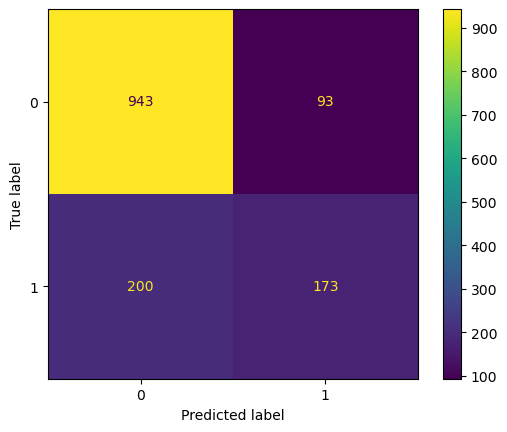

In [22]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot()

# Print the evaluation metrics and plot the confusion matrix
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

<Axes: >

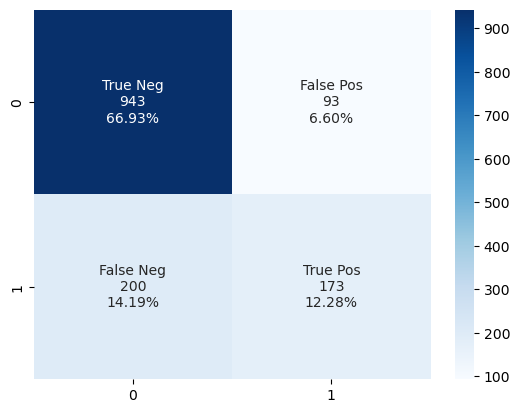

In [23]:
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

In [24]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [25]:
df.Churn_Yes.value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

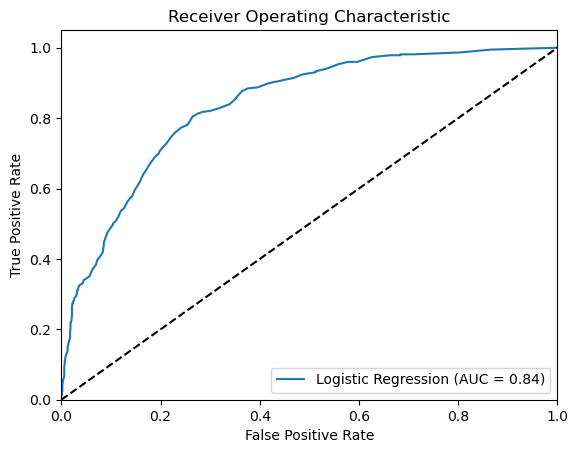

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve

# Make predictions on the testing set
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [ ]:
# import necessary libraries


# create sample data
x_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([3, 5, 7, 9, 11])

# create a linear regression object
model = LinearRegression()

# train the model on the training set
model.fit(x_train, y_train)

# make predictions on new data
x_test = np.array([[6], [7], [8]])
y_pred = model.predict(x_test)

# print the predictions
print(y_pred)